'f1db-csv/f1db-races.csv',
'f1db-csv/f1db-races-race-results.csv',
'f1db-csv/f1db-races-constructor-standings.csv',
'f1db-csv/f1db-races-driver-standings.csv',
'f1db-csv/f1db-races-fastest-laps.csv',
'f1db-csv/f1db-races-starting-grid-positions.csv',
'f1db-csv/f1db-circuits.csv',
'f1db-csv/f1db-constructors.csv',
'f1db-csv/f1db-drivers.csv',
'f1db-csv/f1db-engine-manufacturers.csv',


'f1db-csv/f1db-races-pit-stops.csv',
'f1db-csv/f1db-races-qualifying-results.csv',
'f1db-csv/f1db-constructors-chronology.csv',
'f1db-csv/f1db-seasons-constructors.csv',
'f1db-csv/f1db-seasons-drivers.csv',
'f1db-csv/f1db-seasons-engine-manufacturers.csv',
'f1db-csv/f1db-seasons-entrants-tyre-manufacturers.csv',

In [19]:
import pandas as pd

In [50]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

In [20]:
csv_files = [
        'f1db-csv/f1db-races-race-results.csv',
        'f1db-csv/f1db-circuits.csv',
        'f1db-csv/f1db-constructors-chronology.csv',
        'f1db-csv/f1db-constructors.csv',
        'f1db-csv/f1db-drivers.csv',
        'f1db-csv/f1db-engine-manufacturers.csv',
        'f1db-csv/f1db-races-constructor-standings.csv',
        'f1db-csv/f1db-races-driver-standings.csv',
        'f1db-csv/f1db-races-fastest-laps.csv',
        'f1db-csv/f1db-races-pit-stops.csv',
        'f1db-csv/f1db-races-qualifying-results.csv',
        'f1db-csv/f1db-races-starting-grid-positions.csv',
        'f1db-csv/f1db-races.csv',
        'f1db-csv/f1db-seasons-constructors.csv',
        'f1db-csv/f1db-seasons-drivers.csv',
        'f1db-csv/f1db-seasons-engine-manufacturers.csv',
        'f1db-csv/f1db-seasons-entrants-tyre-manufacturers.csv'
        ]

# Read

In [3]:
import pandas as pd

In [4]:
df_races = pd.read_csv('f1db-csv/f1db-races.csv')
df_races_race_results = pd.read_csv('f1db-csv/f1db-races-race-results.csv')
df_races_driver_standings = pd.read_csv('f1db-csv/f1db-races-driver-standings.csv')
df_races_fastest_laps = pd.read_csv('f1db-csv/f1db-races-fastest-laps.csv')
df_races_constructor_standings = pd.read_csv('f1db-csv/f1db-races-constructor-standings.csv')
df_races_qualifying_results = pd.read_csv('f1db-csv/f1db-races-qualifying-results.csv')
df_races_starting_grid_positions = pd.read_csv('f1db-csv/f1db-races-starting-grid-positions.csv')
df_circuits = pd.read_csv('f1db-csv/f1db-circuits.csv')
df_constructors_chronology = pd.read_csv('f1db-csv/f1db-constructors-chronology.csv')
df_constructors = pd.read_csv('f1db-csv/f1db-constructors.csv')
df_drivers = pd.read_csv('f1db-csv/f1db-drivers.csv')
df_engine_manufacturers = pd.read_csv('f1db-csv/f1db-engine-manufacturers.csv')
df_seasons_constructors = pd.read_csv('f1db-csv/f1db-seasons-constructors.csv')
df_seasons_drivers = pd.read_csv('f1db-csv/f1db-seasons-drivers.csv')
df_seasons_engine_manufacturers = pd.read_csv('f1db-csv/f1db-seasons-engine-manufacturers.csv')
df_seasons_entrants_tyre_manufacturers = pd.read_csv('f1db-csv/f1db-seasons-entrants-tyre-manufacturers.csv')

C:\Users\ruana\AppData\Local\Temp\ipykernel_14304\623872534.py:2: DtypeWarning: Columns (31,32) have mixed types. Specify dtype option on import or set low_memory=False.
  df_races_race_results = pd.read_csv('f1db-csv/f1db-races-race-results.csv')


In [5]:
df_races.rename(columns={'id': 'raceId'}, inplace=True)
df_circuits.rename(columns={'id': 'circuitId'}, inplace=True)
df_constructors.rename(columns={'id': 'constructorId'}, inplace=True)
df_drivers.rename(columns={'id': 'driverId'}, inplace=True)
df_engine_manufacturers.rename(columns={'id': 'engineManufacturerId'}, inplace=True)

In [6]:
def prefixar_sem_id(df, prefixo):
    return df.rename(columns={
        col: f"{prefixo}{col}" if "Id" not in col else col
        for col in df.columns
    })

In [7]:
from itertools import combinations

def encontrar_chave(df, colunas=None, max_comb=10, verbose=False):
    if colunas is None:
        # pega apenas colunas que parecem ser IDs
        colunas = [col for col in df.columns if ((col=='id') or ('Id' in col))]
        print(colunas)
    
    for r in range(1, min(len(colunas), max_comb) + 1):
        for comb in combinations(colunas, r):
            n_unique = df[list(comb)].drop_duplicates().shape[0]
            if verbose:
                print(f"Testando: {comb} → {n_unique} únicos")
            if n_unique == len(df):
                return comb  # encontrou chave única

    return None  # nenhuma combinação encontrada

In [299]:
encontrar_chave(df_seasons_entrants_tyre_manufacturers, verbose=False)

['entrantId', 'constructorId', 'engineManufacturerId', 'tyreManufacturerId']


In [ ]:
# 1149 registros - df_races
# 26911 registros - df_races_race_results
# 26912 registros - df_races_qualifying_results

df_merge = df_races \
    .merge(prefixar_sem_id(df_races_race_results, 'races_race_results_'), how='left', on='raceId') \
    .merge(prefixar_sem_id(df_races_constructor_standings, 'races_constructor_standings_'), how='left', on=['raceId', 'constructorId', 'engineManufacturerId']) \
    .merge(prefixar_sem_id(df_races_driver_standings, 'races_driver_standings_'), how='left', on=['raceId', 'driverId']) \
    .merge(prefixar_sem_id(df_races_starting_grid_positions, 'races_starting_grid_positions_'), how='left', on=['raceId', 'driverId', 'constructorId', 'engineManufacturerId', 'tyreManufacturerId']) \
    .merge(prefixar_sem_id(df_circuits, 'circuits_'), how='left', on=['circuitId']) \
    .merge(prefixar_sem_id(df_constructors, 'constructors_'), how='left', on=['constructorId']) \
    .merge(prefixar_sem_id(df_drivers, 'drivers_'), how='left', on=['driverId']) \
    .merge(prefixar_sem_id(df_engine_manufacturers, 'engine_manufacturers_'), how='left', on=['engineManufacturerId']) \
    .merge(prefixar_sem_id(df_seasons_constructors, 'seasons_constructors_'), how='left', left_on=['constructorId', 'year'], right_on=['constructorId', 'seasons_constructors_year']) \
    .merge(prefixar_sem_id(df_seasons_drivers, 'seasons_drivers_'), how='left', left_on=['driverId', 'year'], right_on=['driverId', 'seasons_drivers_year']) \
    .merge(prefixar_sem_id(df_seasons_engine_manufacturers, 'seasons_engine_manufacturers_'), how='left', left_on=['engineManufacturerId', 'year'], right_on=['engineManufacturerId', 'seasons_engine_manufacturers_year']) \
    .merge(prefixar_sem_id(df_races_qualifying_results, 'races_qualifying_results_'), how='left', on=['raceId', 'driverId', 'constructorId', 'engineManufacturerId', 'tyreManufacturerId']) \
    # .merge(prefixar_sem_id(df_races_fastest_laps, 'races_fastest_laps_'), how='left', on=['raceId', 'driverId', 'constructorId', 'engineManufacturerId', 'tyreManufacturerId']) \
    # .merge(prefixar_sem_id(df_constructors_chronology, 'constructors_chronology_'), how='left', on=['constructorId']) \
    # .merge(prefixar_sem_id(df_seasons_entrants_tyre_manufacturers, 'seasons_entrants_tyre_manufacturers_'), how='left', left_on=['year', 'constructorId', 'engineManufacturerId', 'tyreManufacturerId'], right_on=['seasons_entrants_tyre_manufacturers_year', 'constructorId', 'engineManufacturerId', 'tyreManufacturerId']) \
    # .merge(prefixar_sem_id(df_races_pit_stops, 'races_pit_stops_'), how='left', on=['raceId', 'driverId', 'constructorId', 'engineManufacturerId', 'tyreManufacturerId'])
df_merge.shape[0]

26912

In [23]:
df_races_qualifying_results[df_races_qualifying_results.duplicated(subset=['raceId', 'driverId', 'constructorId', 'engineManufacturerId', 'tyreManufacturerId'], keep=False)]

,raceId,year,round,positionDisplayOrder,positionNumber,positionText,driverNumber,driverId,constructorId,engineManufacturerId,...,q1Millis,q2,q2Millis,q3,q3Millis,gap,gapMillis,interval,intervalMillis,laps
25511,1089,2023,10,15,NaN,NC,77,valtteri-bottas,alfa-romeo,ferrari,...,89798.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.0
25517,1089,2023,10,21,NaN,DSQ,77,valtteri-bottas,alfa-romeo,ferrari,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [379]:
df_merge['circuitType'].unique()

array(['RACE', 'STREET', 'ROAD'], dtype=object)

In [30]:
df_pole_ganhou = df_merge[(df_merge['races_race_results_positionNumber'] == 1) & (df_merge['races_race_results_qualificationPositionNumber'] == 1)]
df_pole_nao_ganhou = df_merge[(df_merge['races_race_results_positionNumber'] != 1) & (df_merge['races_race_results_qualificationPositionNumber'] == 1)]

In [ ]:
list_raceid = list(df_merge['raceId'].astype(str).unique())
list_raceid_pole_ganhou = list(df_pole_ganhou['raceId'].astype(str).unique())
list_raceid_pole_nao_ganhou = list(df_pole_nao_ganhou['raceId'].astype(str).unique())

In [43]:
lista_pole = list(set(list_raceid_pole_ganhou + list_raceid_pole_nao_ganhou))

In [44]:
list_raceid_not_in_pole = [id for id in list_raceid if id not in lista_pole]

In [47]:
list_raceid_not_in_pole

['1130',
 '1131',
 '1132',
 '1133',
 '1134',
 '1135',
 '1136',
 '1137',
 '1138',
 '1139',
 '1140',
 '1141',
 '1142',
 '1143',
 '1144',
 '1145',
 '1146',
 '1147',
 '1148',
 '1149']

In [63]:
# São corridas que não aconteceram ainda. Necessário eliminar!
df_merge[df_merge['raceId'].astype(str).isin(list_raceid_not_in_pole)][['raceId', 'races_race_results_positionNumber', 'races_race_results_qualificationPositionNumber']]

,raceId,races_race_results_positionNumber,races_race_results_qualificationPositionNumber
26892,1130,NaN,NaN
26893,1131,NaN,NaN
26894,1132,NaN,NaN
26895,1133,NaN,NaN
26896,1134,NaN,NaN
26897,1135,NaN,NaN
26898,1136,NaN,NaN
26899,1137,NaN,NaN
26900,1138,NaN,NaN
26901,1139,NaN,NaN


In [69]:
df_merge.iloc[26891:26893, :][['raceId', 'driverId']]

,raceId,driverId
26891,1129,nico-hulkenberg
26892,1130,NaN


In [75]:
df_races_finished = df_merge[(df_merge['races_race_results_positionNumber'].notna()) & (df_merge['races_race_results_qualificationPositionNumber'].notna()) & (df_merge['driverId'].notna())]

In [76]:
# Fazer função para trazer verdadeiro pole_ganhou, falso pole_nao_ganhou, senão, nulo
df_races_finished['pole_ganhou'] = (df_races_finished['races_race_results_positionNumber'] == 1) & (df_races_finished['races_race_results_qualificationPositionNumber'] == 1)
# df_merge['pole_nao_ganhou'] = (df_merge['races_race_results_positionNumber'] != 1) & (df_merge['races_race_results_qualificationPositionNumber'] == 1)

C:\Users\ruana\AppData\Local\Temp\ipykernel_14304\1147191514.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_races_finished['pole_ganhou'] = (df_races_finished['races_race_results_positionNumber'] == 1) & (df_races_finished['races_race_results_qualificationPositionNumber'] == 1)


In [88]:
df_pole_ganhou_por_corrida = df_races_finished[['raceId', 'year', 'pole_ganhou']].sort_values(by='pole_ganhou', ascending=False).drop_duplicates(subset='raceId', keep='first').sort_values('raceId')
df_pole_ganhou_por_corrida.shape

(1129, 3)

In [89]:
df_pole_ganhou_por_corrida[df_pole_ganhou_por_corrida['pole_ganhou'] == True].count()

raceId         483
year           483
pole_ganhou    483
dtype: int64

In [90]:
df_pole_ganhou_por_corrida[df_pole_ganhou_por_corrida['pole_ganhou'] == False].count()

raceId         646
year           646
pole_ganhou    646
dtype: int64

In [98]:
df_pole_ganhou_por_corrida['year_init'] = (df_pole_ganhou_por_corrida['year'] // 5) * 5
df_pole_ganhou_por_corrida['year_end'] = (df_pole_ganhou_por_corrida['year'] // 5) * 5 + 4
df_pole_ganhou_por_corrida['five_years_interval'] = df_pole_ganhou_por_corrida['year_init'].astype(str) + ' - ' + df_pole_ganhou_por_corrida['year_end'].astype(str)

In [99]:
df_pole_ganhou_por_corrida.head()

,raceId,year,pole_ganhou,year_init,year_end,five_years_interval
0,1,1950,True,1950,1954,1950 - 1954
23,2,1950,True,1950,1954,1950 - 1954
60,3,1950,False,1950,1954,1950 - 1954
90,4,1950,False,1950,1954,1950 - 1954
98,5,1950,False,1950,1954,1950 - 1954


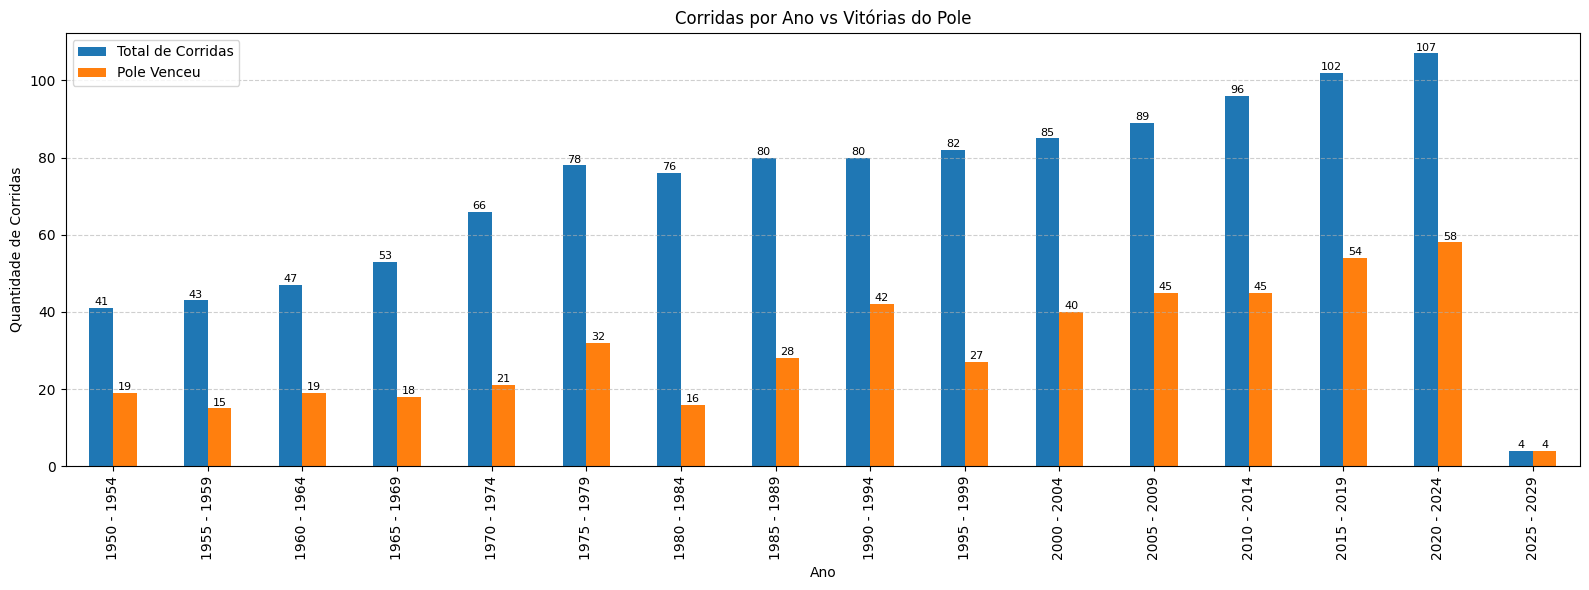

In [101]:
import matplotlib.pyplot as plt

# Total de corridas por ano
total_por_ano = df_pole_ganhou_por_corrida.groupby('five_years_interval').size()

# Corridas em que o pole venceu por ano
pole_ganhou_por_ano = df_pole_ganhou_por_corrida[df_pole_ganhou_por_corrida['pole_ganhou']].groupby('five_years_interval').size()

# Garantir que ambas as séries tenham os mesmos índices (anos)
result = pd.DataFrame({
    'total_corridas': total_por_ano,
    'pole_venceu': pole_ganhou_por_ano
}).fillna(0)

# Converter pole_venceu para inteiro
result['pole_venceu'] = result['pole_venceu'].astype(int)

# Plotando
ax = result.plot(kind='bar', figsize=(16, 6))
plt.title('Corridas por Ano vs Vitórias do Pole')
plt.ylabel('Quantidade de Corridas')
plt.xlabel('Ano')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.legend(['Total de Corridas', 'Pole Venceu'])
plt.tight_layout()

# Adiciona os valores no topo de cada barra
for p in ax.patches:
    altura = p.get_height()
    if altura > 0:
        ax.text(p.get_x() + p.get_width()/2,
                altura + 0.2,                 # ajusta posição vertical
                int(altura),                 # valor a ser exibido
                ha='center', va='bottom', fontsize=8)

plt.show()

In [104]:
df_pole_ganhou_por_circuito = df_races_finished[['raceId', 'year', 'pole_ganhou', 'circuitId']].sort_values(by='pole_ganhou', ascending=False).drop_duplicates(subset='raceId', keep='first').sort_values('raceId')
df_pole_ganhou_por_circuito.shape

(1129, 4)

In [103]:
df_pole_ganhou_por_circuito.head()

,raceId,year,pole_ganhou,circuitId
0,1,1950,True,silverstone
23,2,1950,True,monaco
60,3,1950,False,indianapolis
90,4,1950,False,bremgarten
98,5,1950,False,spa-francorchamps


In [ ]:
result['percentual_pole_venceu_por_total_corrida']

,total_corridas,pole_venceu
circuitId,,
monza,74,24
monaco,70,31
silverstone,59,22
spa-francorchamps,57,23
montreal,43,21
interlagos,41,18
nurburgring,41,15
hungaroring,39,15
spielberg,38,14


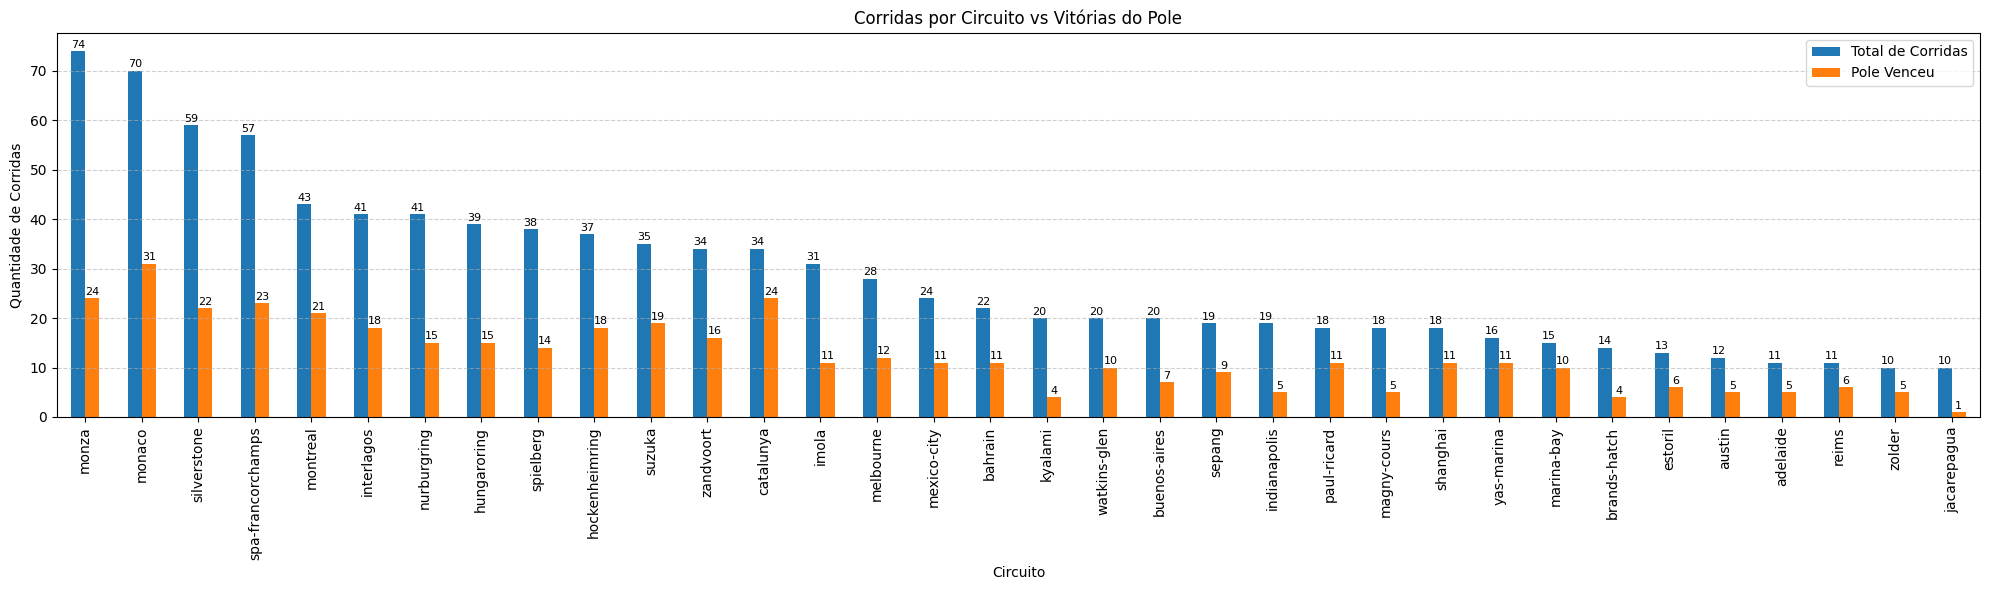

In [ ]:
# Total de corridas por circuito
total_por_circuito = df_pole_ganhou_por_circuito.groupby('circuitId').size()

# Corridas em que o pole venceu por circuito
pole_ganhou_por_circuito = df_pole_ganhou_por_circuito[df_pole_ganhou_por_circuito['pole_ganhou']].groupby('circuitId').size()

# Garantir que ambas as séries tenham os mesmos circuitos
result = pd.DataFrame({
    'total_corridas': total_por_circuito,
    'pole_venceu': pole_ganhou_por_circuito
}).fillna(0)

# Converter pole_venceu para inteiro
result['pole_venceu'] = result['pole_venceu'].astype(int)

# Ordena por total de corridas para melhor visualização
result = result.sort_values(by='total_corridas', ascending=False)

result = result[result['total_corridas'] >= 10]

# Plotando
ax = result.plot(kind='bar', figsize=(20, 6))
plt.title('Corridas por Circuito vs Vitórias do Pole')
plt.ylabel('Quantidade de Corridas')
plt.xlabel('Circuito')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.legend(['Total de Corridas', 'Pole Venceu'])
plt.tight_layout()

# Adiciona os valores no topo de cada barra
for p in ax.patches:
    altura = p.get_height()
    if altura > 0:
        ax.text(p.get_x() + p.get_width()/2,
                altura + 0.3,
                int(altura),
                ha='center', va='bottom', fontsize=8)

plt.show()


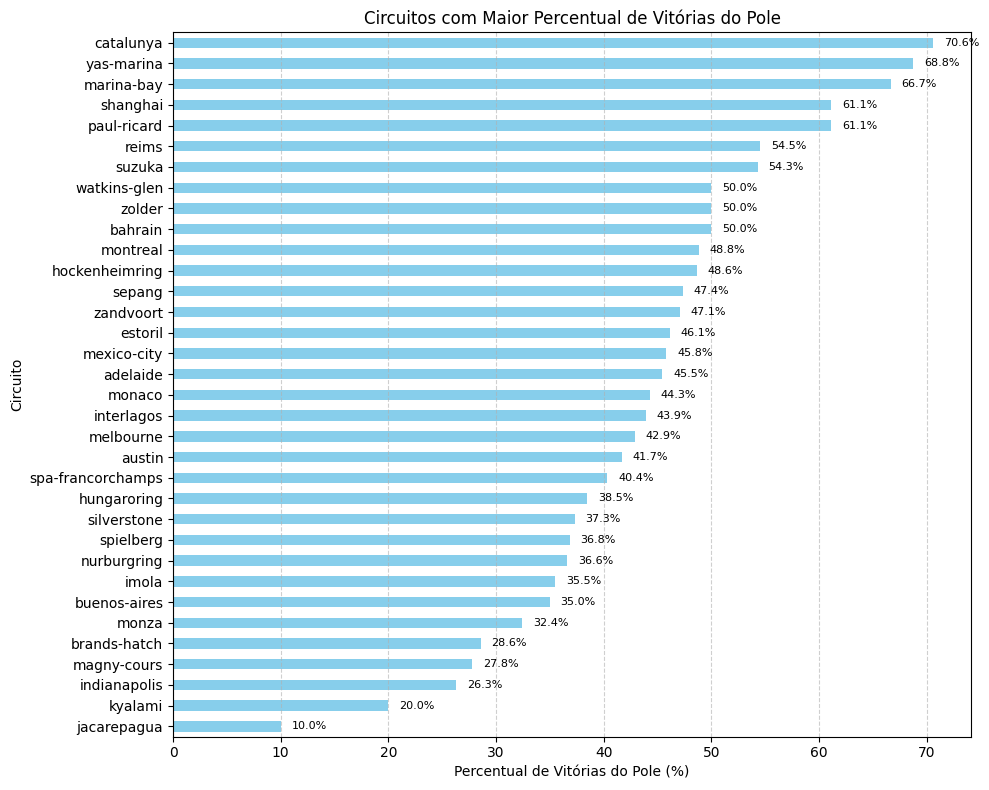

In [125]:
result['percentual_pole_venceu_por_total_corrida'] = round((result['pole_venceu'] / result['total_corridas'] * 100), 2)

# Ordenar pelos maiores percentuais
result_percentual = result.sort_values(by='percentual_pole_venceu_por_total_corrida', ascending=False)

# Filtrar para circuitos com pelo menos 10 corridas (ou outro critério relevante)
result_percentual = result_percentual[result_percentual['total_corridas'] >= 10]

# Plotar
ax = result_percentual['percentual_pole_venceu_por_total_corrida'].plot(
    kind='barh',
    figsize=(10, 8),
    color='skyblue'
)

plt.xlabel('Percentual de Vitórias do Pole (%)')
plt.ylabel('Circuito')
plt.title('Circuitos com Maior Percentual de Vitórias do Pole')
plt.gca().invert_yaxis()  # Coloca o maior no topo
plt.grid(axis='x', linestyle='--', alpha=0.6)

# Adiciona rótulos com os percentuais
for i, (circuito, row) in enumerate(result_percentual.iterrows()):
    ax.text(row['percentual_pole_venceu_por_total_corrida'] + 1, i, f"{row['percentual_pole_venceu_por_total_corrida']:.1f}%", va='center', fontsize=8)

plt.tight_layout()
plt.show()